In [2]:
%load_ext autoreload
%autoreload 2

import torch
from jaspertorch import TinyJasper, CTCLossNM
from optimizers import AdamW
from loader import *

ocr = TinyJasper().cuda()
loss_fn = CTCLossNM(num_classes=len(ocr.charList)+1)
optimizer = AdamW(ocr.parameters(), lr=1e-4)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


129


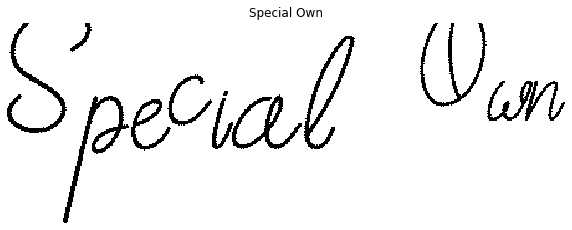

In [70]:
ims, labels, fonts = loaddill('/home/yyr/data/ocr/data-dill-files/synthetic-data-2019-11-16_16:14.dill')
ix = randint(len(ims))
print(ix)
target = labels[ix]
show(ims[ix], title=target)

In [77]:
from load_data import ImgAugTransform
t = ImgAugTransform()
show(t(ims[ix]), grid=True)

In [3]:
N = 100
for _ in range(1000):
    for ix in range(256):
    _im = ocr.preprocess(ims[ix]).cuda()
    optimizer.zero_grad()
    preds = ocr(torch.cat([_im[None]]*N).cuda())
    targets = torch.cat([ocr.str2vec(target)[None]]*N).cuda()
    # targets = torch.cat([torch.tensor([i for i in ocr.str2vec(target) if i!=84])]*2)
    target_lengths = torch.tensor([len(target)]*N).long().cuda()
    input_lengths = torch.tensor([100]*N).long().cuda()
    loss = loss_fn(preds, targets, input_lengths, target_lengths)
    loss.backward()
    print(loss.item())
    optimizer.step()

394.65093994140625
366.9513854980469
355.07049560546875
345.6795349121094
337.80865478515625
329.8532409667969
322.1468811035156
313.28564453125
304.6687927246094
297.0028991699219
290.3349609375
283.4110412597656
276.8423767089844
271.07501220703125
266.1622619628906
262.8202209472656
259.30816650390625
255.5784149169922
252.7020263671875
249.51828002929688
247.01669311523438
244.85696411132812
242.55538940429688
240.31881713867188
238.56863403320312
237.0348358154297
234.7774200439453
233.6223907470703
231.56210327148438
230.21701049804688
228.72222900390625
227.13308715820312
225.34054565429688
223.77798461914062
222.19586181640625
220.63784790039062
219.01597595214844
217.7428436279297
216.32005310058594
214.96310424804688
213.64520263671875
212.50914001464844
211.38717651367188
210.55276489257812
209.37399291992188
208.36448669433594
207.45286560058594
206.51242065429688
205.7943878173828
205.16058349609375
204.2477264404297
203.42335510253906
202.81190490722656
202.19094848632812

153.14718627929688
153.0498046875
152.9899139404297
152.876953125
152.9273681640625
152.808349609375
152.77352905273438
152.71728515625
152.72608947753906
152.5703887939453
152.5416717529297
152.42462158203125
152.4261474609375
152.3157196044922
152.2587432861328
152.08871459960938
152.11415100097656
151.9836883544922
151.8385467529297
151.76580810546875
151.71461486816406
151.66928100585938
151.59103393554688
151.43948364257812
151.39181518554688
151.25057983398438
151.17372131347656
151.0755157470703
151.0701904296875
150.94436645507812
150.99411010742188
150.78860473632812
150.85943603515625
150.63746643066406
150.67822265625
150.53439331054688
150.44313049316406
150.44332885742188
150.350830078125
150.32809448242188
150.31056213378906
150.0738983154297
150.10745239257812
150.12779235839844
150.0278778076172
149.93505859375
149.9139862060547
149.79454040527344
149.73748779296875
149.7415771484375
149.6871337890625
149.6152801513672
149.50247192382812
149.5725555419922
149.5006256103

135.0066680908203
134.95440673828125
134.91343688964844
134.9272918701172
134.96080017089844
134.83432006835938
134.81405639648438
134.77223205566406
134.75425720214844
134.7235107421875
134.70257568359375
134.65484619140625
134.65562438964844
134.5923614501953
134.58970642089844
134.53204345703125
134.45700073242188
134.4537811279297
134.43719482421875
134.3997039794922
134.4280548095703
134.3037872314453
134.34063720703125
134.27159118652344
134.22605895996094
134.22250366210938
134.157470703125
134.08509826660156
134.09642028808594
134.05551147460938
133.97540283203125
133.9449005126953
133.9577178955078
133.9553680419922
133.93296813964844
133.8591766357422
133.78306579589844
133.81915283203125
133.74935913085938
133.73390197753906
133.64697265625
133.69607543945312
133.6410369873047
133.6513214111328
133.6056365966797
133.52537536621094
133.5077667236328
133.51751708984375
133.46731567382812
133.3581085205078
133.3720245361328
133.33909606933594
133.30575561523438
133.311813354492

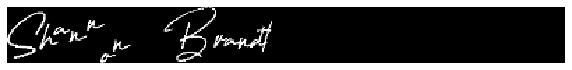

Shanon Brandt


13

In [14]:
_im = ocr.preprocess(ims[431]).cuda()
show(_im.cpu())
preds = ocr(torch.cat([_im[None]]*2))
p = ocr.decoder_chars(preds[0])
print(p)
len(p)